In [1]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X,y=mnist['data'],mnist['target']

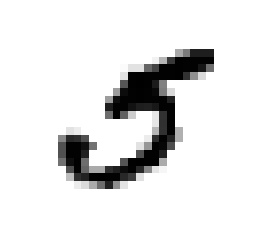

5.0


In [11]:
plt.imshow(X[36000].reshape(-1,28),cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()
print(y[36000])

In [12]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [13]:
import numpy as np
index = np.random.permutation(60000)
X_train,y_train=X_train[index],y_train[index]

In [14]:
y_train_5=y_train==5
y_test_5=y_test==5

In [18]:
from sklearn.linear_model import SGDClassifier
sgdC=SGDClassifier(random_state=42)
sgdC.fit(X_train,y_train_5)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [19]:
predict_train_y=sgdC.predict(X_train)
predict_test_y=sgdC.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5,predict_train_y))
print(confusion_matrix(y_test_5,predict_test_y))

[[54028   551]
 [ 1324  4097]]
[[9005  103]
 [ 199  693]]


In [25]:
sgdC.predict(X[36000].reshape(1,-1))

array([ True])

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skf=StratifiedKFold(n_splits=3,random_state=42)
for train_index, test_index in skf.split(X_train,y_train_5):
    model_clone = clone(sgdC)
    X_train_skf = X_train[train_index]
    y_train_skf = y_train_5[train_index]
    X_test_skf=X_train[test_index]
    y_test_skf=y_train_5[test_index]
    model_clone.fit(X_train_skf,y_train_skf)
    predict_results = model_clone.predict(X_test_skf)
    print(sum(y_test_skf==predict_results)/len(y_test_skf))
    

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9304


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96955


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9661


In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgdC,X_train,y_train_5,cv=5,scoring='accuracy')

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/s

array([0.96150321, 0.91766667, 0.91991667, 0.96008333, 0.96433036])

In [31]:
from sklearn.model_selection import cross_val_predict
predicts= cross_val_predict(sgdC,X_train,y_train_5,cv=3)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/s

In [33]:
predicts.shape

(60000,)

In [36]:
confusion_matrix(y_train_5,predicts)

array([[53108,  1471],
       [ 1208,  4213]])

In [37]:
confusion_matrix?

In [38]:
threshold=sgdC.decision_function([X[36000]])

array([189720.88583995])

In [54]:
y_score=cross_val_predict(sgdC,X_train,y_train_5,cv=3,method='decision_function')

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/s

In [44]:
from sklearn.metrics import precision_recall_curve

In [55]:
precisions,recalls,threshold = precision_recall_curve(y_train_5,y_score)

In [56]:
def plot_precision_recall_vs_threshold(precisions,recalls,threshold):
    plt.plot(threshold,precisions[:-1],'--b',label='precision')
    plt.plot(threshold,recalls[:-1],'g-',label='recall')
    plt.xlabel('Threshold')
    plt.ylim([0,1])
    plt.legend(loc='upper left')
    plt.show()

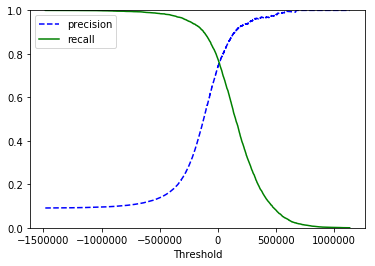

In [57]:
plot_precision_recall_vs_threshold(precisions,recalls,threshold)